In [31]:
# Gauss-Legendre numerical integration
import cmath


def gauss_legendre_4(f):
    x = [-0.8611363116,-0.3399810436,0.3399810436,0.8611363116]
    A = [0.3478548451,0.6521451549,0.6521451549,0.3478548451]

    return sum(A[i] * f(x[i]) for i in range(4))


def transform(f, a, b):
    def g(t):
        return f((b + a) / 2 + (b - a) * t / 2) * (b - a) / 2
    return g


def div(f, a, b, n):
    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]
    
    return x, h, f


def integrate(f, a, b, pre_integral, episilon=1e-7):
    n =1
    while True:
        x, h, f = div(f, a, b, n)
        integral = sum(gauss_legendre_4(transform(f, x[i], x[i + 1])) for i in range(n))
        if abs(integral - pre_integral) < episilon:
            break
        n += 1
 
    

    print(f"一共分出的区间个数: {n}")
    print(f"节点:{x}")
    print(f"积分值: {integral}")
    return integral, n


def f0(x):
    return 1 / (cmath.sin(x) ** 2 + 1/4 * cmath.cos(x) ** 2)

a = 0
b = cmath.pi / 2


integral, n = integrate(f0, a, b, cmath.pi)

一共分出的区间个数: 6
节点:[0.0, 0.2617993877991494, 0.5235987755982988, 0.7853981633974483, 1.0471975511965976, 1.308996938995747, 1.5707963267948966]
积分值: (3.141592666211929+0j)


条件数为: 1464550.484862343
求解得到的向量 c 为: [ 1.23556037 -1.14352337  6.61821092]
条件数为: 2959662452.2838173
求解得到的向量 c 为: [ 3.42909438 -2.37922111  6.84557777 -0.01367456]


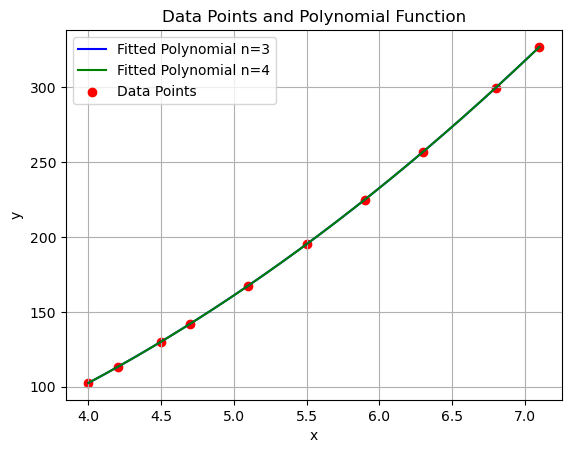

条件数为: 915.1087410183235
求解得到的向量 c 为: [3.1887778  0.37238177]


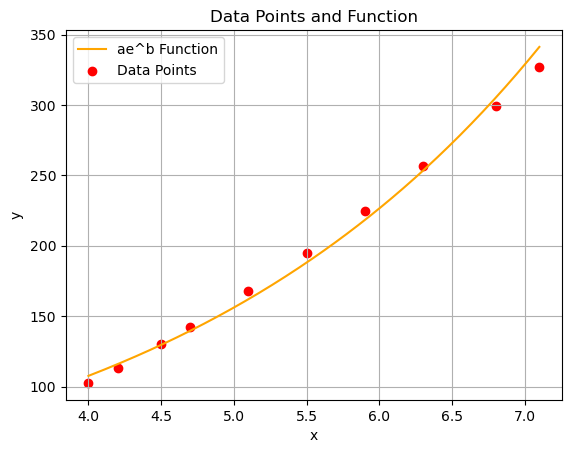

In [32]:
# 最小二乘法

import numpy as np
import matplotlib.pyplot as plt

x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
ys = [102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]
y = [np.log(i) for i in ys]

n_1 = 3
n_2 = 4


def phi_i(x, i):
    return [x[j] ** i for j in range(len(x))]


def get_Y(y, x, n):
    return [np.dot(y, phi_i(x, i)) for i in range(n)]


def get_G(x, n):
    G = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            G[i][j] = np.dot(phi_i(x, i), phi_i(x, j))
    return G


def get_p(ys, x, n):
    Y = np.array(get_Y(ys, x, n))
    G = get_G(x, n)
    cond_number = np.linalg.cond(G)  # 条件数计算
    print("条件数为:", cond_number)
    try:
    # 求解线性方程组 Gc = Y
        c = np.linalg.solve(G, Y)
        p = np.poly1d(c[::-1])  
        print("求解得到的向量 c 为:", c)
    except np.linalg.LinAlgError:
        print("系数矩阵 G 是奇异矩阵，无法求解线性方程组。")
        p = np.poly1d([0])
        c = np.zeros(n)

    return p, c


p_1, c_1 = get_p(ys, x, n_1)
p_2, c_2 = get_p(ys, x, n_2)
x_vals = np.linspace(min(x), max(x), 200)
y1_vals = p_1(x_vals)
y2_vals = p_2(x_vals)
plt.plot(x_vals, y1_vals, label='Fitted Polynomial n=3', color='blue')
plt.plot(x_vals, y2_vals, label='Fitted Polynomial n=4', color='green')



# 绘制数据点和多项式函数

plt.scatter(x, ys, label='Data Points', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Polynomial Function')
plt.legend()
plt.grid(True)
plt.show()


p ,c = get_p(y, x, 2)
b = c[1]
a = np.exp(c[0])
def fx(x):
    return a*np.exp(b*x)

y_valss = fx(x_vals)
plt.plot(x_vals, y_valss, label='ae^b Function', color='orange')
plt.scatter(x, ys, label='Data Points', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Function')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# FFT
import cmath
import numpy as np



m = 3
a = [9, 7, 5, 3, 1, 4, 6, 8]
N = 2**m


a_0 = [a[i] for i in range(0, len(a))]
S = N



def tran(a):
    n = len(a)
    num_bits = n.bit_length() - 1
    result = [0] * n
    for i in range(n):
        binary_str = bin(i)[2:].zfill(num_bits)
        rev_i = int(binary_str[::-1], 2)
        result[rev_i] = a[i]
    return result



def FFT(a,m):
    N = 2**m
    a_0 = a.copy()
    S = N

    while S > 1:
        T = N//S
        for k in range(1, T+1):
            for l in range((k-1)*S, (k-1)*S+S//2 ):
                y = a_0[l]
                a_0[l] = y + a_0[l+S//2]
                a_0[l+S//2] = (y - a_0[l+S//2])*cmath.exp(-2j*cmath.pi*l/S)
        S = S//2

    return tran(a_0)


result = FFT(a, m)

print(result)

[43, (13.65685424949238+2.414213562373095j), (-1+0j), (2.3431457505076194+0.4142135623730947j), (-1+0j), (2.3431457505076203-0.41421356237309376j), (-1-2.4492935982947064e-16j), (13.656854249492381-2.4142135623730803j)]
